In [1]:
import pandas as pd
from src.data import load_profiles
import nltk
from nltk.corpus import stopwords

In [2]:
profiles_df = load_profiles()
bikeReasons = profiles_df["bikeReasonVar"]
bikeReasons = bikeReasons.dropna()

nltk.download("stopwords")
stop_words=set(stopwords.words("german"))

[nltk_data] Downloading package stopwords to /Users/tumor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


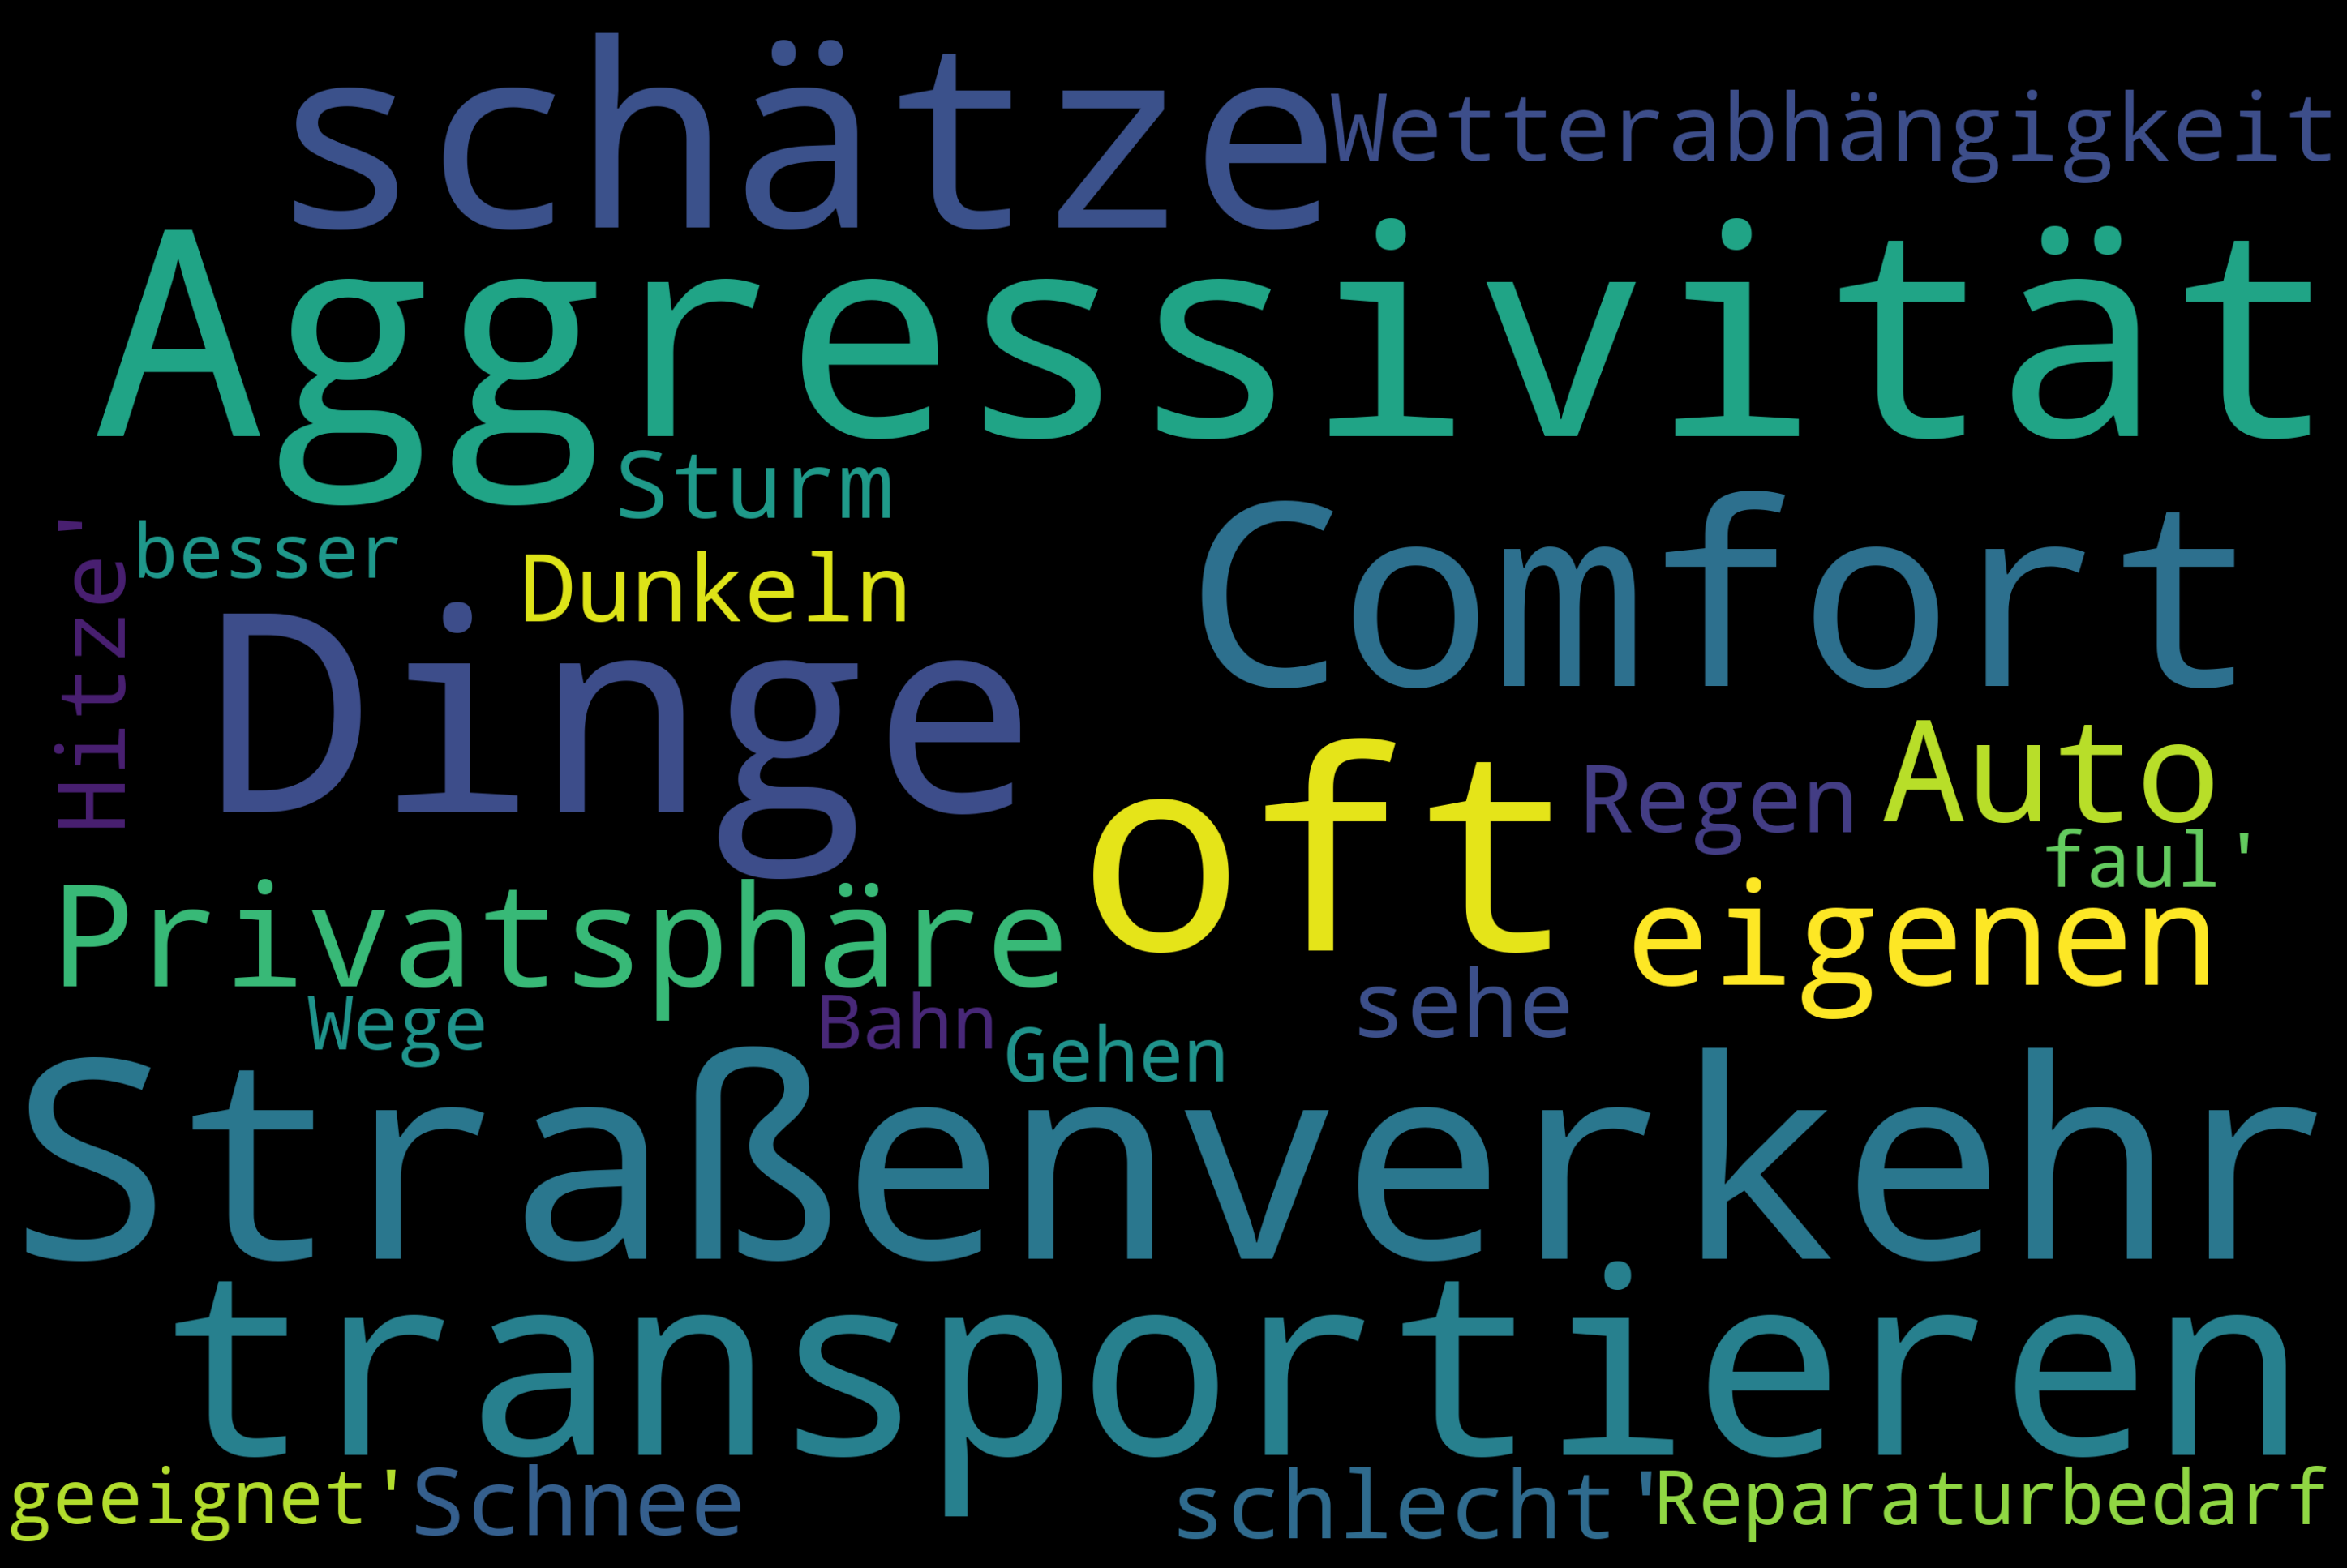

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = bikeReasons.to_numpy()
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(ngram_range=(1, 1), stop_words=list(stop_words))
# input to fit_transform() should be an iterable with strings
ngrams = c_vec.fit_transform(text)
# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# output n-grams
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count > 5:
        print(ng_count, ng_text)

100 wetter
97 fahrrad
50 gefährlich
39 fahren
37 auto
35 winter
35 gesundheitliche
31 rad
31 arbeit
29 angst
26 strecken
26 radfahrer
26 fuß
25 kalt
24 fahre
23 berlin
22 transport
21 transportieren
21 radfahren
20 kurz
20 fahrräder
19 mehr
18 gepäck
18 fehlende
17 öpnv
17 oft
17 gründe
16 mitnehmen
16 hund
16 gestohlen
16 geklaut
16 gehe
16 einkäufe
15 wenig
15 verschwitzt
15 verkehr
15 schlechtes
15 schlechte
15 radwege
15 lieber
15 kleidung
15 fahrradfahrer
15 beruflich
15 behinderung
15 autofahrer
13 wegen
13 viele
13 verkehrsteilnehmer
13 verhalten
13 strecke
13 immer
13 einfach
13 büro
12 unterwegs
12 unsicher
12 straßen
12 probleme
12 möglichkeit
12 lange
11 zeit
11 witterung
11 wege
11 sicher
11 gerne
11 geht
11 dusche
11 diebstahl
11 alt
10 ungeeignet
10 transportmöglichkeiten
10 schon
10 möglich
10 keller
10 gesundheitlich
10 fahrradfahren
10 arbeitsweg
10 aggressives
10 aggressive
10 abstellmöglichkeiten
9 weit
9 verkehrsregeln
9 sommer
9 sichere
9 regen
9 nutze
9 lang
9 käl

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(ngram_range=(1, 2), stop_words=list(stop_words))
# input to fit_transform() should be an iterable with strings
ngrams = c_vec.fit_transform(text)
# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# output n-grams
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count > 3:
        if len(ng_text.split()) > 1:
            print(ng_count, ng_text)

18 fahrrad fahren
15 schlechtes wetter
13 gesundheitliche gründe
8 winter kalt
8 gesundheitliche probleme
8 gehe lieber
8 aggressives verhalten
7 strecken kurz
7 lieber fuß
6 gesundheitliche einschränkungen
6 angst fahrrad
5 verkehr gefährlich
5 regen kälte
5 laufe lieber
4 keller holen
4 gesundheitliche einschränkung
4 gerne fuß
4 fahre gerne
4 dusche büro
4 dauert lange
4 berlin gefährlich
4 auto angewiesen
4 aggressive autofahrer


In [6]:
c_vec = CountVectorizer(ngram_range=(1, 3), stop_words=list(stop_words))
# input to fit_transform() should be an iterable with strings
ngrams = c_vec.fit_transform(text)
# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

# output n-grams
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count > 1:
        if len(ng_text.split()) > 2:
            print(ng_count, ng_text)

6 gehe lieber fuß
3 gehe gerne fuß
3 fahre gerne rad
3 angst fahrrad gestohlen
2 öfter fahrrad fahren
2 winter kalt gefährlich
2 wetter verschmutzte kleidung
2 sichere abstellmöglichkeiten stadt
2 radfahren berlin gefährlich
2 mehr fahrrad fahren
2 gute verbindung öpnv
2 fahrrad steht keller
2 fahrrad keller holen
2 fahrrad fahren berlin
2 berliner verkehr gefährlich
2 aufs auto angewiesen
2 aggressives verhalten verkehrsteilnehmer
2 aggressives verhalten radfahrer
2 aggressives verhalten autofahrer


In [8]:
import spacy

nlp = spacy.load('de_core_news_md')

In [23]:
text.shape

(1008,)

In [22]:
vecs = pd.DataFrame([])
for var in text:
    tokens = nlp(var)
    vecs = vecs.append(pd.Series(tokens.vector), ignore_index=True)

In [25]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(vecs)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

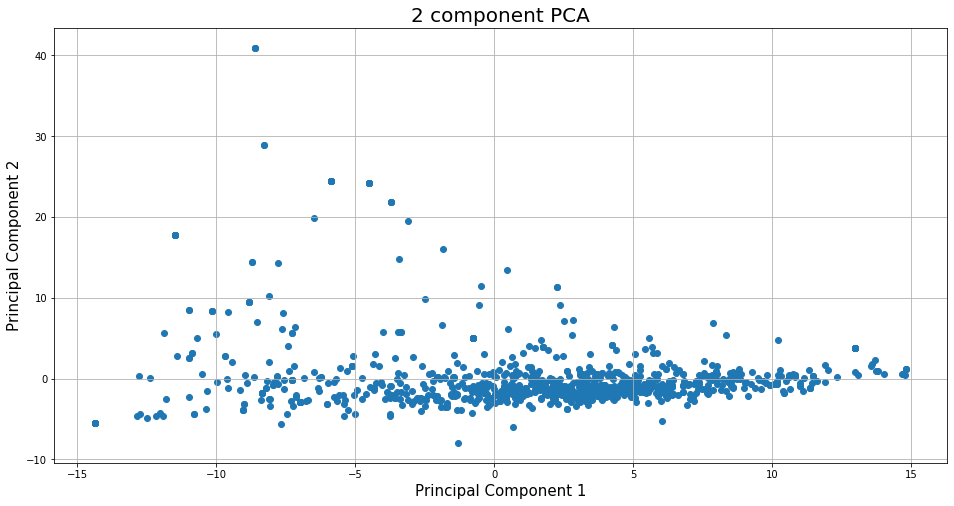

In [27]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()